In [ ]:
import numpy as np
import pandas as pd
import json
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

import pprint
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.disable_eager_execution()

# Reading the data
data = pd.read_csv("/content/Fake_train.csv")
data.head()
test_data=pd.read_csv("/content/Fake_test_without_labels.csv")

In [ ]:
# encoding the labels
le = preprocessing.LabelEncoder()
le.fit(data['label'])
data['label'] = le.transform(data['label'])
data

,text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,0
1,Masha Allah,0
2,"അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...",0
3,Illathentha avaru purath vidayittalland verenth,0
4,Barana pakshathin matoru niyamam.nalla moyanth...,1
...,...,...
3252,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...,1
3253,ഇതാണ് പിണുവാതിര😂😂😂,1
3254,കേസ് എടുക്കണം 💯👍,1
3255,എല്ലാത്തിനേം 501 സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം,1


In [ ]:
embedding_dim = 50
max_length = 54
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 3000
test_portion = .1


In [ ]:

text = []
labels = []
for x in range(training_size):

	text.append(data['text'][x])
	labels.append(data['label'][x])


In [ ]:
from typing_extensions import Text
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(text)
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
sequences1 = tokenizer1.texts_to_sequences(text)
padded1 = pad_sequences(
	sequences1, padding=padding_type, truncating=trunc_type)
split = int(test_portion * training_size)
training_sequences1 = padded1[split:training_size]
test_sequences1 = padded1[0:split]
test_labels = labels[0:split]
training_labels = labels[split:training_size]
print(training_sequences1)
print(training_labels)

[[ 5336  5337  5338 ...     0     0     0]
 [ 2301  1242  2302 ...     0     0     0]
 [  999  1000   120 ...     0     0     0]
 ...
 [ 1627 16122  1627 ...     0     0     0]
 [  174   431 16126 ...     0     0     0]
 [  145    14   168 ...     0     0     0]]
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

In [ ]:
import numpy as np

embeddings_index = {}
embedding_file_path = 'Fake_train.csv'  # Provide the correct file path

# Read word embeddings from the file
with open(embedding_file_path) as f:
    for line in f:
        values = line.split()

        # Check if the line is not empty
        if not values:
            continue

        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            print(f"Skipping line: {line}")
            continue

# Check if the embeddings_index is empty
if not embeddings_index:
    print("The embeddings_index is empty. Please check your word embeddings file.")
else:
    # Generating embeddings matrix
    vocab_size1 = len(word_index1)  # Make sure word_index1 is defined

    # Choose a word that is present in your word embeddings file
    example_word = next(iter(embeddings_index.keys()))

    embedding_dim = len(embeddings_index[example_word])
    embeddings_matrix = np.zeros((vocab_size1 + 1, embedding_dim))

    for word, i in word_index1.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_matrix[i] = embedding_vector
        else:
            # Handle missing embeddings (e.g., set a default vector)
            embeddings_matrix[i] = np.zeros(embedding_dim)  # Example: Setting a default vector of zeros


Skipping line: നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake

Skipping line: Masha Allah,Fake

Skipping line: "അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ കലാപം പോലെ ആകുമോ.. സ്വന്തം ആളെ തന്നെ പിടിച്ചു അകത്തിടേണ്ടി വരുമോ?",Fake

Skipping line: Illathentha avaru purath vidayittalland verenth,Fake

Skipping line: Barana pakshathin matoru niyamam.nalla moyanth manthrii,original

Skipping line: Marunnu adyam kandupidichittey virous kandupidikkullu China.,Fake

Skipping line: Sudappikal Naadu mudikkum. Moorikallkk eandhu Rajiyasneham. 😡,Fake

Skipping line: നാണമുണ്ടോ ഗവണ്മെന്റെ?,original

Skipping line: Aaayur Veathana an Oru vitamin Aaalugal Sareerathin keadillaathea Kayikkunnath Roagam maarunnumund but<br>Eee vaythyanmaar parayunnath Seriyaanoo annariyoola<br>Onnu pareeksichoodea<br>Aarudea velluvili seegarikk<br>Koroanayulla aalugaludea adutheakk<br>Vid,Fake

Skipping line: 😂😂😂😂😂😂patt sakhavine pokki parayuano atho trolluvano,original

Skipping line: ഖുർആൻ നിൽ ഉണ്ടാവും അതിന്റ മരുന്ന് വായിച്ചു ന

In [ ]:
import tensorflow as tf

# Placeholder values, replace with your actual values
vocab_size1 = 16140
embedding_dim = 500

import numpy as np

# Placeholder values, replace with your actual values
vocab_size1 = 16140
embedding_dim = 500

# Generate a placeholder embeddings_matrix with random values
embeddings_matrix = np.random.rand(vocab_size1 + 1, embedding_dim)

# Your model definition here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size1 + 1, output_dim=embedding_dim,
                              input_length=max_length, weights=[embeddings_matrix],
                              trainable=False),
    # Add the rest of your model layers here
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 54, 500)           8070500   
                                                                 
 dropout_2 (Dropout)         (None, 54, 500)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 64)            160064    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 12, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
text = data['text'][:training_size]
labels = data['label'][:training_size]

tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(text)
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
max_length = 54
# Assuming you have already defined and tokenized your text and labels
sequences1 = tokenizer1.texts_to_sequences(text)
padded1 = pad_sequences(sequences1, padding=padding_type, truncating=trunc_type, maxlen=max_length)

split = int(test_portion * training_size)
training_sequences1 = padded1[split:training_size]
test_sequences1 = padded1[0:split]
training_labels = labels[split:training_size]
testing_labels = labels[0:split]


# Assuming you have defined your model and processed data correctly up to this point
# Now, let's train your model
num_epochs = 50  # Adjust the number of epochs as needed

history = model.fit(training_sequences1, training_labels,
                    epochs=num_epochs,
                    validation_data=(test_sequences1, testing_labels),
                    verbose=2)


Train on 2700 samples, validate on 300 samples
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2700/2700 - 2s - loss: 0.7007 - accuracy: 0.4963 - val_loss: 0.6897 - val_accuracy: 0.5333 - 2s/epoch - 652us/sample
Epoch 2/50
2700/2700 - 1s - loss: 0.6874 - accuracy: 0.5415 - val_loss: 0.6770 - val_accuracy: 0.5533 - 1s/epoch - 472us/sample
Epoch 3/50
2700/2700 - 1s - loss: 0.6770 - accuracy: 0.5719 - val_loss: 0.6676 - val_accuracy: 0.6400 - 1s/epoch - 489us/sample
Epoch 4/50
2700/2700 - 1s - loss: 0.6723 - accuracy: 0.5885 - val_loss: 0.6598 - val_accuracy: 0.6367 - 1s/epoch - 469us/sample
Epoch 5/50
2700/2700 - 1s - loss: 0.6676 - accuracy: 0.5993 - val_loss: 0.6539 - val_accuracy: 0.6400 - 1s/epoch - 491us/sample
Epoch 6/50
2700/2700 - 1s - loss: 0.6662 - accuracy: 0.5963 - val_loss: 0.6505 - val_accuracy: 0.6267 - 1s/epoch - 461us/sample
Epoch 7/50
2700/2700 - 2s - loss: 0.6636 - accuracy: 0.6059 - val_loss: 0.6557 - val_accuracy: 0.6167 - 2s/epoch - 638us/sample
Epoch 8/50
2700/2700 - 2s - loss: 0.6638 - accuracy: 0.6026 - val_loss: 0.6591 - val_accuracy: 0.5833 - 2s/epoch - 

In [ ]:
loss, accuracy = model.evaluate(test_sequences1, testing_labels)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.653333306312561


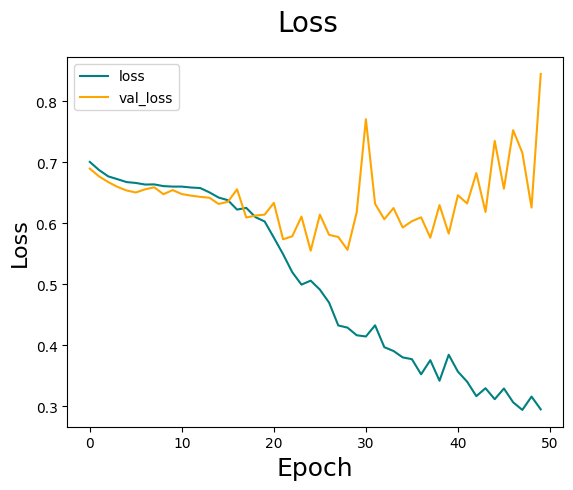

In [ ]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.legend()
plt.show()


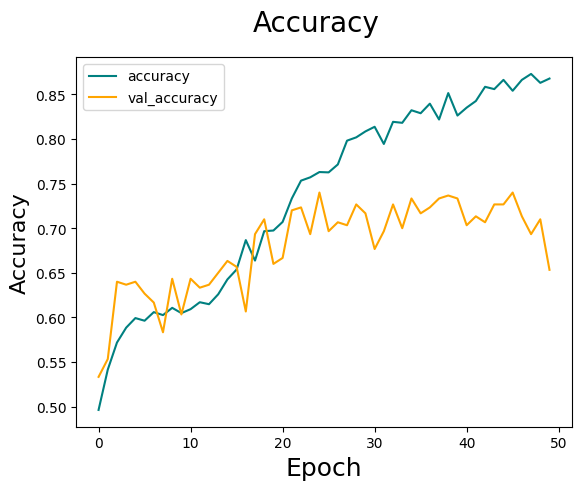

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [ ]:
test_data

,text
0,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...
1,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...
2,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...
3,Shame for entire Woman&#39
4,135 code janaghal andhu wide business cheythal...
...,...
1014,Correct ...China cheitha ...weapon spread ing ...
1015,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...
1016,Mask illa aarkum😏😏
1017,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!


In [ ]:
classifications = []

for text in test_data['text']:
    # Tokenize and pad the sequence
    sequences = tokenizer1.texts_to_sequences([text])
    sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Perform prediction
    prediction = model.predict(sequences, verbose=0)[0][0]

    # Define a threshold for classification (e.g., 0.5)
    threshold = 0.5

    # Classify based on the threshold
    is_true = prediction >= threshold

    # Append the classification to the list
    classifications.append((text, is_true))

# Print the results
for text, is_true in classifications:
    print(text)
    print(is_true)
# Convert boolean values to strings 'True' or 'False'
classifications = [(text, str(is_true)) for text, is_true in classifications]

# Convert the list of tuples to a DataFrame
df = pd.DataFrame(classifications, columns=['text', 'is_true'])

# Save the DataFrame to a CSV file
df.to_csv('lstm_OUTPUT.csv', index=False)


5000 ഉള്ള പോൾ  ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ കാരണം
True
ഓഷോ രജനീഷ്  പറഞ്ഞപോലെ  എനിക്കപ്പോൾ തോന്നിയത് അങ്ങനെയാണ് ..ഇപ്പോൾ തോന്നുന്നത് ഇങ്ങനെയാണ് ...എന്തൊക്കെയോ ആവോ
True
ചേട്ടാ  വാർത്ത  വയ്ക്കുന്നത്  കേരളത്തിലാണ്  സംഘി ഭരിക്കുന്ന നോർത്ത്  ഇന്ത്യയിലല്ല,ഇവിടെ  ആരോഗ്യ മന്ത്രി  ഷൈലടീച്ചറാണ്
True
Shame for entire Woman&#39
True
135 code janaghal andhu wide business cheythalum vijayikum in India
True
Why not all countries club together n block china to the maximum extend, and rename covid 19 as chinese virus? In all such cases when some one work to destroy others,  the nature intervene n contain such negative force.  That is the grace of god, the truth.
True
Ethil appuram നാണക്കേഡ് വന്നിട്ടില്ല cpmne🤣🤣🤣adipoli nalla avatharanam
True
കൊറോണ പോയി ഒന്ന് കൂടെ മെച്ചപ്പെട്ട് ഓമൈക്രോനായി വന്നപ്പോൾ നമ്മുടെ പിണുവിന്റെ നേതൃത്വത്തിൽ ഒരു സീകരണം കൊടുത്തതല്ലേ
False
മോളെ. ഇത് കോമഡി സ്റ്റാർസ് അല്ല. ചിരിച്ചും കളിച്ചും വിശേഷം ചോദിക്കാൻ
True
Marunaadan kandupidutham
True
ഈ പാട്ടിനു ആടിയ ചേച്ചീസിന്റെ തൊലിക്കട്ടി